<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Musterlösung 7</h1>
    Ausgabe: 2. Dezember 2022 10:00 Uhr, Abgabe: 9. Dezember 2022 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 3: Monte Carlo Simulation (10P)</h3>
</font>

In der Vorlesung haben wir so-genannte Monte Carlo (MC) Simulationen kennengelernt. Diese wollen wir in dieser Aufgabe näher untersuchen indem wir eine eigene MC Simulation entwerfen.

<font face="Times New Roman" size=4>
a) Zufallsgenerator (1P)
</font>

Wir betrachten zunächst die Funktion `ran0(seed)`, die für ein gewisses Seed `seed` bei jedem Aufruf eine neue Zufallszahl generiert. Bearbeiten Sie diese Funktion, sodass Sie zwei Parameter `maximum` and `minimum` nehmen um den Bereich der generierten Zahlen dadurch definieren. Geben Sie dann ein paar Zufallszahlen in verschiedenen Bereichen aus, um Ihre Änderungen zu testen.

In [1]:
def ran0(seed, minimum=0, maximum=1):
    m = 2**31-1
    a = 7**5
    c = 0
    while True:
        seed = (a * seed + c) % m
        yield seed/(m+1.)

_Ein bisschen Python Erklärung:_ die Funktion `ran0` gibt einen so-genannten `Generator` zurück, weswegen sie anstelle des Befehls `return` den Befehl `yield` verwendet. Ein Generator ist praktisch ein "iterable" (= ein Objekt, über das man iterieren kann, also z.B. eine Liste von Elementen wie `mylist` in `for x in mylist`), das aber nur einmal iteriert werden kann. Wofür ist das gut? Performance. Und Flexibilität. In unserem Fall sehen wir dass `ran0` einen infinite loop enthält (`while True:`), also eine Schleife die aufgrund der Schleifenbedingung nie aufhören würde. In jeder Iteration gibt der `yield` Befehl eine neue Zufallszahl zurück, die außerhalb der Funktion via `next(x)` extrahiert werden kann, wobei `x` der Pointer zum Generator ist, also `x=ran0(...)`. D.h. außerhalb muss man eine Schleife machen, die eine fixe Anzahl Iterationen durchläuft (entsprechend der Anzahl Zufallszahlen, di eman haben möchte) und dann pro Iteration eine neue Zufallszahl vom Generator extrahiert. Bemerke, dass nichts davon funktionieren würde, wenn wir `return` statt `yield` verwenden würden. Dann müsste `ran0` eine Liste mit einer vorher festgelegten Anzahl Elemente befüllen und alle Zufallszahlen im Speicher behalten, selbst wenn sie später nicht verwendet werden - etwas, was man vermeiden möchte wenn man es mit sehr sehr viel Zufallszahlen zu tun hat (was üblicherweise in der Physik der Fall ist).

In [2]:
def ran0(seed, minimum=0, maximum=1):
    m = 2**31-1
    a = 7**5
    c = 0
    while True:
        seed = (a * seed + c) % m
        yield seed/(m+1.)*(maximum-minimum)+minimum

In [3]:
# test: generate 10 random numbers between 0 and 1
x = ran0(1234567) 
for i in range(10):
    print(next(x))

0.6621772171929479
0.21249454421922565
0.3958063554018736
0.31741833686828613
0.8499902291223407
0.785787511151284
0.7307060691528022
0.9769099694676697
0.9258644883520901
0.004462979733943939


In [4]:
# test: generate 10 random numbers between -1 and 1
x = ran0(1234567,-1,1) 
for i in range(10):
    print(next(x))

0.32435443438589573
-0.5750109115615487
-0.20838728919625282
-0.36516332626342773
0.6999804582446814
0.571575022302568
0.46141213830560446
0.9538199389353395
0.8517289767041802
-0.9910740405321121


<font face="Times New Roman" size=4>
b) Darstellung (1P)
</font>

Die Qualität eines Zufallszahlgenerators kann validiert werden durch die Darstellung der Frequenz der generierten Zufallszahlen in einem gegebenen Intervall mit gleichmäßigem Binning. Erstellen Sie zwei Diagramme, eines für 100 und eines für 10000 Zufallszahlen. Verwenden Sie 10 Bins im Intervall $[0,1]$. Die Anzahl Einträge sollte die gleiche sein für alle Bins unter Berücksichtigung der statistischen Fehler.

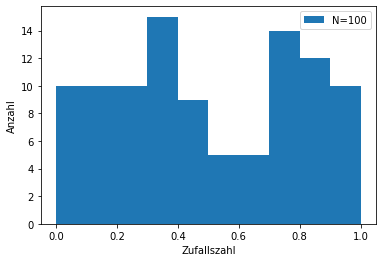

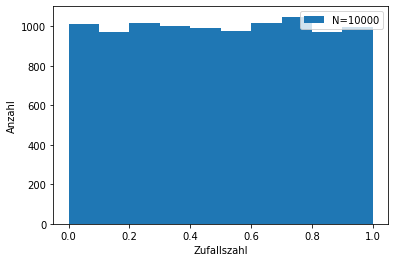

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plotRan0(n):
    x = ran0(1234567)
    nparray = np.empty(n)
    for i in range(n): 
        nparray[i] = next(x)
    plt.hist(nparray, 10, (0, 1), label=f"N={n}")
    plt.xlabel("Zufallszahl")
    plt.ylabel("Anzahl")
    plt.legend()
    plt.show()
    
plotRan0(100)
plotRan0(10000)

<font face="Times New Roman" size=4>
c) Transformationsmethode (4P)
</font>

Generieren Sie nun 1000 Zufallszahlen um mit der Transformationsmethode die Funktion $f(\theta)=1+\cos(\theta)+\cos(\theta)^2$ zu simulieren und befüllen Sie dann ein Histogramm für $x=\cos(\theta)$ mit 20 Bins im Intervall $[-1,1]$. Zum Vergleich, plotten Sie auch die eigentliche Funktion (diese müssen Sie ggf. zu Ihrem Histogramm norieren).

_Hinweis:_ Falls Sie das Integral nicht mit Python lösen möchten, dürfen Sie das Integral auch per Hand durchführen.

_Hinweis:_ Um eine Python-Funktion zu integrieren, verwenden Sie am besten die Funktion `integrate.quad` aus der Bibliothek `scipy`, https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html.

_Hinweis:_ Sie können die Inverse der Funktion auf die folgende Art und Weise via der Bibliothek `sympy` erstellen, die die Möglichkeit zu symbolischen Berechnungen bietet (z.B. können Sie damit eine Funktion integrieren ohne Integrationsgrenzen geben zu müssen):

In [6]:
import sympy as sy
x,y,z = sy.symbols("x y z", positive=True) ## define variables within sympy
f     = 1+z+z**2                           ## define the function using z = cos(theta)
cdf   = sy.integrate(f, (z, -1, x))        ## symbolic integration of f to get the CDF
tot   = sy.simplify(cdf.subs(x, 1))        ## integral of f from -1 to 1
cdf   = cdf/tot                            ## normalization of CDF
ppf   = sy.simplify(sy.solve(cdf-y,x)[2])  ## the PPF, i.e. the inverse function
func  = sy.lambdify(y,ppf)                 ## convert it to a python function



In [18]:
print(func(-1))
pdf = sy.lambdify(z, f)
print(pdf(np.linspace(-1, 1, 10)))
tot = integrate.quad(pdf,-1,1)[0]
print(tot)

-2.24589390637844
[1.         0.82716049 0.75308642 0.77777778 0.90123457 1.12345679
 1.44444444 1.86419753 2.38271605 3.        ]
2.666666666666667


In [7]:
import math
import scipy.integrate as integrate

In [8]:
import sympy as sy
x,y,z = sy.symbols("x y z", positive=True)
f = 1 + z + z**2 # z = cos(theta)

0.9733333333333337
0.8666666666666669
0.8479999999999994
0.7093333333333336
0.7626666666666668
0.7599999999999995
0.7626666666666668
0.7040000000000003
1.0053333333333339
0.946666666666667
1.0346666666666657
1.1893333333333325
1.2453333333333352
1.501333333333332
1.626666666666669
1.8959999999999986
2.0559999999999983
2.4240000000000035
2.541333333333331
2.8133333333333375


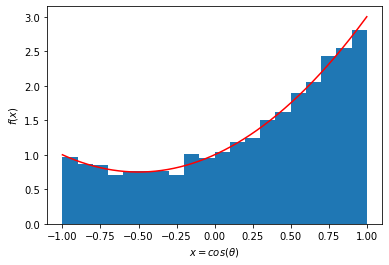

In [23]:
def invMethod(f, n, r=20):
    cdf    = sy.integrate(f, (z, -1, x))
    tot    = sy.simplify(cdf.subs(x, 1))
    cdf    = cdf/tot
    ppf    = sy.simplify(sy.solve(cdf-y,x)[2])
    func   = sy.lambdify(y,ppf)
    # calculate pdf --> f = 1 + z + z**2
    pdf = sy.lambdify(z, f)
    # integrate over pdf to norm bins
    tot = integrate.quad(pdf,-1,1)[0]
    
    ## create histogram 
    # initialize random number generator
    rand   = ran0(1234567)
    # initialize np.array
    nphist = np.empty(n)
    # fill np.array with the inverse function 
    # evaluated at random positions
    for i in range(n):
        t = next(rand)
        nphist[i] = func(t)    
    # create histogramm
    vals,bins,p = plt.hist(nphist, r, (-1, 1), density=True)
    # adjust height of histogramm
    for item in p:
        item.set_height(item.get_height()*tot) # scale to integral

    # plot reference
    xx = np.linspace(-1,1,n)
    plt.plot(xx, pdf(xx), color="red")
    plt.xlabel(fr"$x=cos(\theta)$")
    plt.ylabel("$f(x)$")
    plt.show()
        
invMethod(f, 10000)

<font face="Times New Roman" size=4>
d) Hit-und-Miss Methode (4P)
</font>

Wiederholen Sie Aufgabenteil c) mit der Hit-und-Miss Methode. 

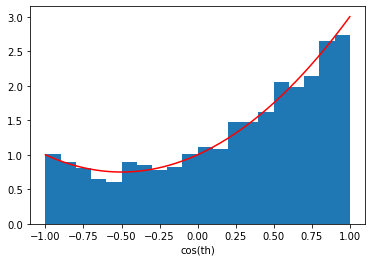

In [19]:
def rejMethod(f, n, r=20):
    func   = sy.lambdify(z, f)
    pmax   = func(1)
    rand1  = ran0(1234567,-1,1)
    rand2  = ran0(3425256,0,pmax)
    nphist = np.array([])
    for i in range(n):
        t = next(rand1)
        y = next(rand2)
        if y>func(t): continue
        nphist = np.append(nphist, t)
    pdf = sy.lambdify(z, f)
    tot = integrate.quad(pdf,-1,1)[0]
    vals,bins,p = plt.hist(nphist, r, (-1, 1), density=True)
    for item in p:
        item.set_height(item.get_height()*tot) # scale to integral
    
    # plot reference
    xx = np.linspace(-1,1,n)
    plt.plot(xx, pdf(xx), color="red")
    plt.xlabel("cos(th)")
    plt.show()
        
rejMethod(f, 10000)